In [ ]:
# ĐỖ LÊ PHÁT TRIỂN-19146053

In [ ]:
# Khai báo và sử dụng các thư viện sau
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

170508288/170498071 [==============================] - 3s 0us/step


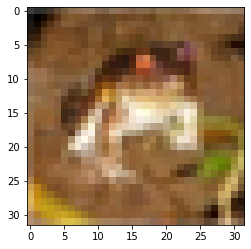

In [ ]:
# Sử dụng tập dữ liệu MNIST với bộ dữ liệu đã chia giữa phần train là 50000 và phần test là 10000
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
plt.imshow(x_train[0])
plt.show()

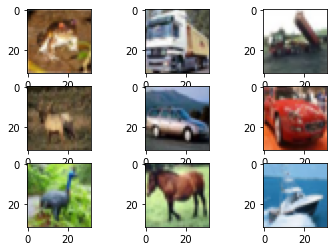

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
scaler=preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
model=Sequential()
model.add(Dense(3072,activation='relu',input_shape=(3072,)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_33 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dense_35 (Dense)            (None, 10)                5130      
                                                                 
Total params: 13,116,938
Trainable params: 13,116,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch 
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 50 lần học thì sẽ dừng học ngay
history= model.fit(x_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/500
313/313 [==============================] - 87s 276ms/step - loss: 2.3807 - accuracy: 0.3246 - val_loss: 1.8213 - val_accuracy: 0.3680
Epoch 2/500
313/313 [==============================] - 87s 277ms/step - loss: 1.6429 - accuracy: 0.4184 - val_loss: 1.7307 - val_accuracy: 0.3976
Epoch 3/500
313/313 [==============================] - 87s 276ms/step - loss: 1.5161 - accuracy: 0.4655 - val_loss: 1.5994 - val_accuracy: 0.4358
Epoch 4/500
313/313 [==============================] - 87s 277ms/step - loss: 1.4308 - accuracy: 0.4933 - val_loss: 1.6152 - val_accuracy: 0.4488
Epoch 5/500
313/313 [==============================] - 87s 277ms/step - loss: 1.3602 - accuracy: 0.5196 - val_loss: 1.6471 - val_accuracy: 0.4685
Epoch 6/500
313/313 [==============================] - 87s 277ms/step - loss: 1.3105 - accuracy: 0.5408 - val_loss: 1.6372 - val_accuracy: 0.4610
Epoch 7/500
313/313 [==============================] - 86s 276ms/step - loss: 1.2590 - accuracy: 0.5555 - val_loss: 1.5411 -

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 4.4478302001953125
Test Accuracy 0.5072000026702881


<function matplotlib.pyplot.show>

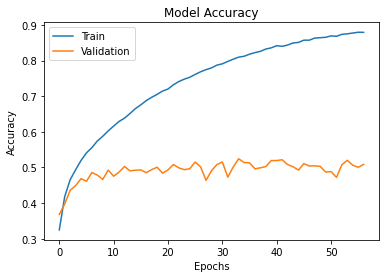

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CIFAR10.ipynb') # Tên file colab

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'